In [52]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

In [2]:
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:
from datasets import load_dataset

dataset = load_dataset("SetFit/bbc-news")
main_df = dataset["train"].to_pandas()

In [4]:
main_df.head()

,text,label,label_text
0,wales want rugby league training wales could f...,2,sport
1,china aviation seeks rescue deal scandal-hit j...,1,business
2,rock band u2 break ticket record u2 have smash...,3,entertainment
3,markets signal brazilian recovery the brazilia...,1,business
4,tough rules for ringtone sellers firms that fl...,0,tech


In [5]:
main_df.groupby('label')['text'].value_counts()

label  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [6]:
main_df.groupby('label_text')['text'].value_counts()

label_text  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [7]:
main_df.nunique()

text          1194
label            5
label_text       5
dtype: int64

In [8]:
main_df['label_text'].value_counts()

label_text
business         286
sport            275
politics         242
tech             212
entertainment    210
Name: count, dtype: int64

In [9]:
main_df.isna().sum()

text          0
label         0
label_text    0
dtype: int64

In [10]:
main_df['label'].value_counts()

label
1    286
2    275
4    242
0    212
3    210
Name: count, dtype: int64

In [11]:
main_df['text']

0       wales want rugby league training wales could f...
1       china aviation seeks rescue deal scandal-hit j...
2       rock band u2 break ticket record u2 have smash...
3       markets signal brazilian recovery the brazilia...
4       tough rules for ringtone sellers firms that fl...
                              ...                        
1220    us economy shows solid gdp growth the us econo...
1221    microsoft releases bumper patches microsoft ha...
1222    stuart joins norwich from addicks norwich have...
1223    why few targets are better than many the econo...
1224    boothroyd calls for lords speaker betty boothr...
Name: text, Length: 1225, dtype: object

In [12]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        1225 non-null   object
 1   label       1225 non-null   int64 
 2   label_text  1225 non-null   object
dtypes: int64(1), object(2)
memory usage: 28.8+ KB


In [13]:
main_df['label'].min()

np.int64(0)

In [14]:
main_df['label'].max()

np.int64(4)

In [15]:
print(repr(main_df.iloc[255]['text']))

'o sullivan quick to hail italians ireland coach eddie o sullivan heaped praise on italy after seeing his side stutter to a 28-17 victory in rome.   it was a hell of a tough game   said o sullivan.  we struggled in the first half because we hadn t the football.  italy played really well. they handled the ball well in terms of kicking it  if that s not an oxymoron.  we said before the game that it might take until 10 minutes from the end for this game to be won  and that s how it turned out.  ireland struggled to cope with italy s fierce start and were indebted to skipper brian o driscoll  who set up tries for geordan murphy and peter stringer.  we had our first attack in the italian half after 22 minutes   said o sullivan.  we had a good return  with three first-half possessions in their half and we scored twice.  the second half was about spending more time in their half.  scrum-half peter stringer was also glad that ireland escaped wtih a victory.  all credit to them   he told bbc sp

In [16]:
main_df['label_text'].value_counts().sort_index(ascending=False)

label_text
tech             212
sport            275
politics         242
entertainment    210
business         286
Name: count, dtype: int64

In [17]:
main_df.loc[main_df['label_text']=='sport']['text']

0       wales want rugby league training wales could f...
13      young debut cut short by ginepri fifteen-year-...
16      pearce keen on succeeding keegan joint assista...
23      harinordoquy suffers france axe number eight i...
27      davenport dismantles young rival top seed lind...
                              ...                        
1210    ferguson puts faith in youngsters manchester u...
1211    premier league planning cole date the premier ...
1216    wales make two changes for france wales coach ...
1218    celtic unhappy over bulgaria date martin o nei...
1222    stuart joins norwich from addicks norwich have...
Name: text, Length: 275, dtype: object

In [18]:
main_df.loc[main_df['label_text']=='business']['text']

1       china aviation seeks rescue deal scandal-hit j...
3       markets signal brazilian recovery the brazilia...
9       bbc poll indicates economic gloom citizens in ...
18      ask jeeves tips online ad revival ask jeeves h...
21      ad firm wpp s profits surge 15% uk advertising...
                              ...                        
1201    crossrail link  to get go-ahead  the £10bn cro...
1212    jp morgan admits us slavery links thousands of...
1214    safety alert as gm recalls cars the world s bi...
1220    us economy shows solid gdp growth the us econo...
1223    why few targets are better than many the econo...
Name: text, Length: 286, dtype: object

In [19]:
main_df['text'] = main_df['text'].str.strip().str.lower()

In [20]:
main_df['text'].head()

0    wales want rugby league training wales could f...
1    china aviation seeks rescue deal scandal-hit j...
2    rock band u2 break ticket record u2 have smash...
3    markets signal brazilian recovery the brazilia...
4    tough rules for ringtone sellers firms that fl...
Name: text, dtype: object

In [21]:
main_df['text']= main_df['text'].astype(str).apply(lambda x: re.sub(r'[.,?!*&"\']','',x))

In [22]:
main_df['text']

0       wales want rugby league training wales could f...
1       china aviation seeks rescue deal scandal-hit j...
2       rock band u2 break ticket record u2 have smash...
3       markets signal brazilian recovery the brazilia...
4       tough rules for ringtone sellers firms that fl...
                              ...                        
1220    us economy shows solid gdp growth the us econo...
1221    microsoft releases bumper patches microsoft ha...
1222    stuart joins norwich from addicks norwich have...
1223    why few targets are better than many the econo...
1224    boothroyd calls for lords speaker betty boothr...
Name: text, Length: 1225, dtype: object

<Axes: xlabel='label', ylabel='Count'>

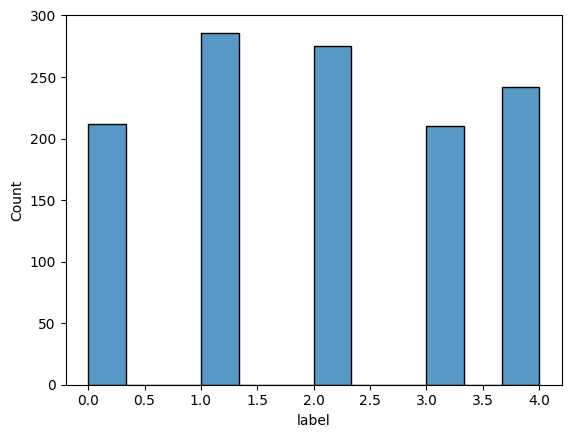

In [23]:
sns.histplot(data=main_df,x='label')

In [24]:
x= main_df['text']
y= main_df['label']
x_train,x_test,y_train,y_test=(train_test_split(x,y))

In [25]:
x_train

723     gardener battles to narrow win jason gardener ...
471     german growth goes into reverse germany s econ...
182     greer attacks  bully  big brother germaine gre...
542     sa return to mauritius top seeds south africa ...
1213    brando  rejected godfather role  late film sta...
                              ...                        
618     strong quarterly growth for nike nike has repo...
1133    spark heads world booker list dame muriel spar...
856     economy  stronger than forecast  the uk econom...
1095    khodorkovsky ally denies charges a close assoc...
831     celebrities get to stay in jungle all four con...
Name: text, Length: 918, dtype: object

In [26]:
x_test

1083    air jamaica back in state control the jamaican...
872     latin america sees strong growth latin america...
699     vickery out of six nations england tight-head ...
841     net regulation  still possible  the blurring o...
1       china aviation seeks rescue deal scandal-hit j...
                              ...                        
506     anelka  eyes man city departure  striker nicol...
644     continental  may run out of cash  shares in co...
1148    uk gets official virus alert site a rapid aler...
500     kelly trails new discipline power teachers cou...
246     what price for  trusted pc security   you can ...
Name: text, Length: 307, dtype: object

In [27]:
y_train

723     2
471     1
182     3
542     2
1213    3
       ..
618     1
1133    3
856     1
1095    1
831     3
Name: label, Length: 918, dtype: int64

In [28]:
y_test

1083    1
872     1
699     2
841     0
1       1
       ..
506     2
644     1
1148    0
500     4
246     0
Name: label, Length: 307, dtype: int64

In [29]:
vec_model = CountVectorizer(stop_words='english')
#Scikit-learn’in hazır İngilizce stop word listesini al
#ve bu kelimeleri vektörleştirme sırasında tamamen görmezden gel
#Yani model “the”, “is”, “and” gibi kelimeleri hiç feature yapmaz.

In [30]:
x_train_vec = vec_model.fit_transform(x_train).toarray()

In [31]:
x_test_vec = vec_model.transform(x_test).toarray()

In [32]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [33]:
gnb_model = GaussianNB()
gnb_model.fit(x_train_vec,y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [34]:
train_preds_gauss =  gnb_model.predict(x_train_vec)
test_preds_gauss = gnb_model.predict(x_test_vec)

In [35]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
print('GAUSSIAN NAIVE BAYES ON THE TRAINING DATA ')
print(f'confussion matrix :\n {confusion_matrix(y_true=y_train,y_pred=train_preds_gauss)}')
print(f'accuracy_score : \n {accuracy_score(y_true=y_train,y_pred=train_preds_gauss)}')
print(f'classification_report : \n {classification_report(y_true= y_train,y_pred=train_preds_gauss)}')

GAUSSIAN NAIVE BAYES ON THE TRAINING DATA 
confussion matrix :
 [[152   0   0   0   0]
 [  0 222   0   0   0]
 [  0   0 203   0   0]
 [  0   0   0 155   0]
 [  0   0   0   0 186]]
accuracy_score : 
 1.0
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       222
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       155
           4       1.00      1.00      1.00       186

    accuracy                           1.00       918
   macro avg       1.00      1.00      1.00       918
weighted avg       1.00      1.00      1.00       918



In [37]:
print('GAUSSIAN NAIVE BAYES ON THE TESTING DATA ')
print(f'confussion matrix :\n {confusion_matrix(y_true=y_test,y_pred=test_preds_gauss)}')
print(f'accuracy_score : \n {accuracy_score(y_true=y_test,y_pred=test_preds_gauss)}')
print(f'classification_report : \n {classification_report(y_true= y_test,y_pred=test_preds_gauss)}')

GAUSSIAN NAIVE BAYES ON THE TESTING DATA 
confussion matrix :
 [[53  3  0  3  1]
 [ 3 55  0  1  5]
 [ 1  1 69  0  1]
 [ 4  0  0 51  0]
 [ 0  3  0  1 52]]
accuracy_score : 
 0.9120521172638436
classification_report : 
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        60
           1       0.89      0.86      0.87        64
           2       1.00      0.96      0.98        72
           3       0.91      0.93      0.92        55
           4       0.88      0.93      0.90        56

    accuracy                           0.91       307
   macro avg       0.91      0.91      0.91       307
weighted avg       0.91      0.91      0.91       307



In [38]:
multinomia = MultinomialNB()
multinomia.fit(x_train_vec,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [39]:
train_preds_multi = multinomia.predict(x_train_vec)
test_preds_multi = multinomia.predict(x_test_vec)

In [40]:
print('MultinomialNB NAIVE BAYES ON THE TRAINING DATA ')
print(f'confussion matrix :\n {confusion_matrix(y_true=y_train,y_pred=train_preds_multi)}')
print(f'accuracy_score : \n {accuracy_score(y_true=y_train,y_pred=train_preds_multi)}')
print(f'classification_report : \n {classification_report(y_true= y_train,y_pred=train_preds_multi)}')

MultinomialNB NAIVE BAYES ON THE TRAINING DATA 
confussion matrix :
 [[151   0   0   1   0]
 [  1 220   0   0   1]
 [  0   0 203   0   0]
 [  0   0   0 155   0]
 [  1   0   0   0 185]]
accuracy_score : 
 0.9956427015250545
classification_report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       152
           1       1.00      0.99      1.00       222
           2       1.00      1.00      1.00       203
           3       0.99      1.00      1.00       155
           4       0.99      0.99      0.99       186

    accuracy                           1.00       918
   macro avg       1.00      1.00      1.00       918
weighted avg       1.00      1.00      1.00       918



In [41]:
print('MultinomialNB NAIVE BAYES ON THE TESTING DATA ')
print(f'confussion matrix :\n {confusion_matrix(y_true=y_test,y_pred=test_preds_multi)}')
print(f'accuracy_score : \n {accuracy_score(y_true=y_test,y_pred=test_preds_multi)}')
print(f'classification_report : \n {classification_report(y_true= y_test,y_pred=test_preds_multi)}')

MultinomialNB NAIVE BAYES ON THE TESTING DATA 
confussion matrix :
 [[56  0  1  2  1]
 [ 0 61  0  0  3]
 [ 0  0 72  0  0]
 [ 1  0  0 53  1]
 [ 0  1  0  0 55]]
accuracy_score : 
 0.9674267100977199
classification_report : 
               precision    recall  f1-score   support

           0       0.98      0.93      0.96        60
           1       0.98      0.95      0.97        64
           2       0.99      1.00      0.99        72
           3       0.96      0.96      0.96        55
           4       0.92      0.98      0.95        56

    accuracy                           0.97       307
   macro avg       0.97      0.97      0.97       307
weighted avg       0.97      0.97      0.97       307



In [42]:
#### topic ####

In [43]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [45]:
Tfidf_text_vectorizer = TfidfVectorizer(stop_words=list(stopwords),min_df=5,max_df=0.7)
Tfidf_text_vectors = Tfidf_text_vectorizer.fit_transform(main_df['text'])

/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:411: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


In [46]:
Tfidf_text_vectors.shape

(1225, 6281)

In [47]:
Tfidf_text_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 148367 stored elements and shape (1225, 6281)>

In [49]:
nmf_text_model = NMF(n_components=8,random_state=46)
w_text_matrix = nmf_text_model.fit_transform(Tfidf_text_vectors)# “TF-IDF ile sayıya çevirdiğim metinleri al, bunları 10 topic’e böl.”
h_text_matrix = nmf_text_model.components_

/home/vscode/.local/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1720: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [50]:
def display_topics(model,features,no_top_words=3):
    for topic,word in enumerate(model.components_):
        total = word.sum()
        largest = word.argsort()[::-1] # invert sort order
        print(f'\ntopic {topic}')
        for i in range(0,no_top_words):
            print(f"{features[largest[i]]} ({word[largest[i]]*100/total:.2f})")

In [51]:
display_topics(nmf_text_model,Tfidf_text_vectorizer.get_feature_names_out())


topic 0
england (0.83)
game (0.77)
wales (0.57)

topic 1
mr (1.68)
labour (1.50)
election (1.21)

topic 2
growth (1.17)
economy (1.09)
economic (0.78)

topic 3
people (0.69)
mobile (0.65)
music (0.57)

topic 4
film (2.21)
best (1.24)
awards (0.80)

topic 5
yukos (0.93)
government (0.57)
company (0.56)

topic 6
champion (0.80)
indoor (0.78)
world (0.77)

topic 7
lse (3.27)
boerse (3.05)
deutsche (3.05)


In [53]:

# SVD = anlam örüntüsü yakalama
svd_para_model = TruncatedSVD(n_components=6,random_state=46)
w_text_matrix = svd_para_model.fit_transform(Tfidf_text_vectors)
h_text_matrixv = svd_para_model.components_


In [54]:
display_topics(svd_para_model,Tfidf_text_vectorizer.get_feature_names_out())


topic 0
mr (0.44)
year (0.27)
people (0.26)

topic 1
mr (-2.82)
labour (-2.60)
election (-2.12)

topic 2
growth (-10.91)
economy (-8.90)
market (-8.68)

topic 3
film (529.98)
people (279.09)
music (275.60)

topic 4
film (-14.03)
best (-7.84)
awards (-5.07)

topic 5
yukos (3.41)
company (2.05)
deutsche (1.92)
